### Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import lazypredict
from lazypredict.Supervised import LazyClassifier

# PreProcessing

### Load dataset

In [3]:
# Read the data from the CSV file
train_data = pd.read_csv('dataset/train.csv')

#Mapping classi to genere
genres = ['Acoustic/Folk', 'Alt Music', 'Blues', 'Bollywood', 'Country', 'HipHop', 'Indie', 'Instrumental', 'Metal', 'Pop', 'Rock']


### Handling missing values

In [4]:
#Because the missing values are few we can fill them with 0
train_data.fillna(0,inplace=True)

train_data = train_data[[
        'Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       #'key',
        'loudness',
        #'mode',
        'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 
       'valence', # ??
       'tempo',
       'duration_in min/ms', 'time_signature', 'Class']].copy()

In [5]:
train_data.rename(columns={
                           'Artist Name': 'Artist_Name',
                            'Track Name': 'Track_Name',
                            'danceability': 'Danceability',
                            'energy': 'Energy',
                            'loudness': 'Loudness',                           
                            'speechiness': 'Speechiness',
                            'acousticness': 'Acousticness',
                            'instrumentalness': 'Instrumentalness',
                            'liveness': 'Liveness',
                            'valence': 'Valence',
                            'tempo': 'Tempo_bpm',
                            'duration_in min/ms': 'Duration_ms',
                            'time_signature': 'Time_Signature',
                           }, inplace=True)



numeric_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo_bpm', 'Duration_ms', 'Time_Signature']
print(train_data.columns)

Index(['Artist_Name', 'Track_Name', 'Popularity', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo_bpm', 'Duration_ms', 'Time_Signature',
       'Class'],
      dtype='object')


In [6]:
#print the support of each class
print(train_data['Class'].value_counts())

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64


In [7]:
#Split the train data into train and test

X = train_data[numeric_features]
y = train_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) 


### Classification with Logistic Regression

<Axes: >

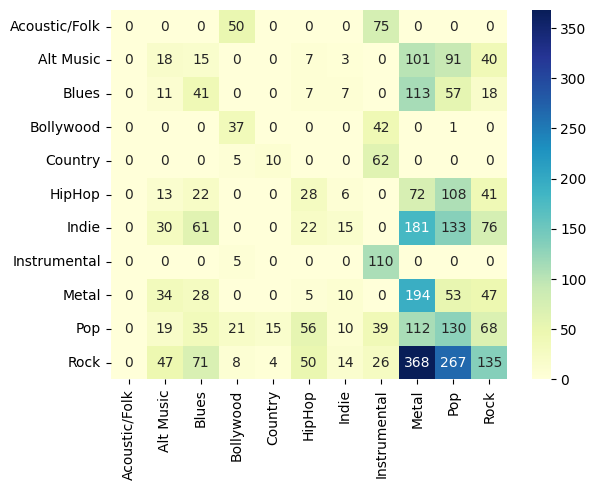

In [8]:
#Train the model Logisitc Regression with train data
logistic_model = LogisticRegression(class_weight='balanced')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=genres, yticklabels=genres)


In [9]:
#make a report of the model 
print(metrics.classification_report(y_test, y_pred, target_names=genres))


               precision    recall  f1-score   support

Acoustic/Folk       0.00      0.00      0.00       125
    Alt Music       0.10      0.07      0.08       275
        Blues       0.15      0.16      0.16       254
    Bollywood       0.29      0.46      0.36        80
      Country       0.34      0.13      0.19        77
       HipHop       0.16      0.10      0.12       290
        Indie       0.23      0.03      0.05       518
 Instrumental       0.31      0.96      0.47       115
        Metal       0.17      0.52      0.26       371
          Pop       0.15      0.26      0.19       505
         Rock       0.32      0.14      0.19       990

     accuracy                           0.20      3600
    macro avg       0.20      0.26      0.19      3600
 weighted avg       0.22      0.20      0.17      3600



In [10]:
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

In [11]:
# select the models to test
lazypredict.Supervised.CLASSIFIERS = lazypredict.Supervised.CLASSIFIERS[0:11] + lazypredict.Supervised.CLASSIFIERS[15:17] + lazypredict.Supervised.CLASSIFIERS[19:28]

In [12]:
# check the list again
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('NearestCentroid', sklearn.neighbors._nearest_centroid.NearestCentroid),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('QuadraticDiscriminantAnalysis',
  sklearn.discrimina

In [13]:
clf = LazyClassifier(verbose= 1,ignore_warnings=True, custom_metric= None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values(by='Accuracy', ascending=False)

  5%|▍         | 1/22 [00:03<01:23,  3.95s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.2733333333333333, 'Balanced Accuracy': 0.3830169474247626, 'ROC AUC': None, 'F1 Score': 0.19070994953016263, 'Time taken': 3.9532952308654785}


  9%|▉         | 2/22 [00:11<02:06,  6.31s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.4647222222222222, 'Balanced Accuracy': 0.5383007342697912, 'ROC AUC': None, 'F1 Score': 0.4591440986364977, 'Time taken': 7.9582531452178955}
{'Model': 'BernoulliNB', 'Accuracy': 0.3952777777777778, 'Balanced Accuracy': 0.39467604199043554, 'ROC AUC': None, 'F1 Score': 0.36167440012799107, 'Time taken': 0.07273435592651367}


 18%|█▊        | 4/22 [00:14<00:57,  3.18s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.48833333333333334, 'Balanced Accuracy': 0.501298377145704, 'ROC AUC': None, 'F1 Score': 0.4546897081530092, 'Time taken': 2.546743631362915}


 36%|███▋      | 8/22 [00:15<00:16,  1.18s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.3675, 'Balanced Accuracy': 0.4555875646424743, 'ROC AUC': None, 'F1 Score': 0.37297865133445884, 'Time taken': 0.9667782783508301}
{'Model': 'DummyClassifier', 'Accuracy': 0.275, 'Balanced Accuracy': 0.09090909090909091, 'ROC AUC': None, 'F1 Score': 0.11862745098039218, 'Time taken': 0.050206661224365234}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.31472222222222224, 'Balanced Accuracy': 0.3606901308005238, 'ROC AUC': None, 'F1 Score': 0.3191978627657614, 'Time taken': 0.13663482666015625}


 41%|████      | 9/22 [00:23<00:35,  2.75s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.49916666666666665, 'Balanced Accuracy': 0.5578814928075834, 'ROC AUC': None, 'F1 Score': 0.48719658285491785, 'Time taken': 8.215116739273071}
{'Model': 'GaussianNB', 'Accuracy': 0.45055555555555554, 'Balanced Accuracy': 0.5141872713069854, 'ROC AUC': None, 'F1 Score': 0.42425611783357503, 'Time taken': 0.0630955696105957}


 50%|█████     | 11/22 [00:25<00:22,  2.05s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.4311111111111111, 'Balanced Accuracy': 0.5120936164450994, 'ROC AUC': None, 'F1 Score': 0.42638022695050815, 'Time taken': 1.8174076080322266}


 55%|█████▍    | 12/22 [00:26<00:18,  1.85s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.495, 'Balanced Accuracy': 0.5144144144025837, 'ROC AUC': None, 'F1 Score': 0.46273272892996026, 'Time taken': 1.1451168060302734}
{'Model': 'NearestCentroid', 'Accuracy': 0.4172222222222222, 'Balanced Accuracy': 0.5258580663257237, 'ROC AUC': None, 'F1 Score': 0.39085062736053866, 'Time taken': 0.05798029899597168}


 64%|██████▎   | 14/22 [00:27<00:09,  1.20s/it]

{'Model': 'Perceptron', 'Accuracy': 0.32666666666666666, 'Balanced Accuracy': 0.35442937956434256, 'ROC AUC': None, 'F1 Score': 0.3159680211686187, 'Time taken': 0.2552509307861328}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.4772222222222222, 'Balanced Accuracy': 0.5350809140300191, 'ROC AUC': None, 'F1 Score': 0.45049265183718185, 'Time taken': 0.06676769256591797}


 82%|████████▏ | 18/22 [00:50<00:12,  3.23s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.5025, 'Balanced Accuracy': 0.5628841902549325, 'ROC AUC': None, 'F1 Score': 0.49139027872450897, 'Time taken': 22.71482515335083}
{'Model': 'RidgeClassifier', 'Accuracy': 0.44333333333333336, 'Balanced Accuracy': 0.3387051777389918, 'ROC AUC': None, 'F1 Score': 0.38038268176981915, 'Time taken': 0.08767271041870117}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.44333333333333336, 'Balanced Accuracy': 0.3387051777389918, 'ROC AUC': None, 'F1 Score': 0.38038268176981915, 'Time taken': 0.10999536514282227}


 86%|████████▋ | 19/22 [00:51<00:08,  2.77s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.40555555555555556, 'Balanced Accuracy': 0.46903324808668484, 'ROC AUC': None, 'F1 Score': 0.37131232377983175, 'Time taken': 0.8698239326477051}


 91%|█████████ | 20/22 [01:24<00:18,  9.35s/it]

{'Model': 'SVC', 'Accuracy': 0.5308333333333334, 'Balanced Accuracy': 0.5529600146162804, 'ROC AUC': None, 'F1 Score': 0.4965254401259285, 'Time taken': 33.17220854759216}


100%|██████████| 22/22 [01:28<00:00,  4.03s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.5125, 'Balanced Accuracy': 0.5737184925078785, 'ROC AUC': None, 'F1 Score': 0.49922077201927084, 'Time taken': 4.287382364273071}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.51,0.57,None,0.50,4.29
RandomForestClassifier,0.50,0.56,None,0.49,22.71
ExtraTreesClassifier,0.50,0.56,None,0.49,8.22
SVC,0.53,0.55,None,0.50,33.17
BaggingClassifier,0.46,0.54,None,0.46,7.96
QuadraticDiscriminantAnalysis,0.48,0.54,None,0.45,0.07
NearestCentroid,0.42,0.53,None,0.39,0.06
LogisticRegression,0.49,0.51,None,0.46,1.15
GaussianNB,0.45,0.51,None,0.42,0.06


In [16]:
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.53,0.55,None,0.50,33.17
XGBClassifier,0.51,0.57,None,0.50,4.29
RandomForestClassifier,0.50,0.56,None,0.49,22.71
ExtraTreesClassifier,0.50,0.56,None,0.49,8.22
LogisticRegression,0.49,0.51,None,0.46,1.15
CalibratedClassifierCV,0.49,0.50,None,0.45,2.55
QuadraticDiscriminantAnalysis,0.48,0.54,None,0.45,0.07
BaggingClassifier,0.46,0.54,None,0.46,7.96
GaussianNB,0.45,0.51,None,0.42,0.06
